In [2]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

random_data = IntervalData.make_interval_blobs(n_samples=100, n_clusters=3, n_dims = 4)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
    Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0         -8.561591        -7.823287        -4.380604        -4.280604   
1        -10.073436        -5.924829         6.407721         8.126022   
2         -8.447627        -3.635228         6.383061         7.934016   
3          6.957785        10.348754         3.163585         6.939569   
4         -6.776658        -6.186197        -5.862434        -3.861270   
..              ...              ...              ...              ...   
95        -9.113701        -7.344990        -5.383263        -4.591152   
96        -9.775198        -5.355537         6.119845         7.144235   
97        -6.682251        -5.390158        -4.404533        -2.572423   
98         7.581459        12.291819         4.346479         6.559549   
99         5.907119         9.673868         4.596569         7.491964   

    Feature_3_lower  Feature_3_upper  Feature_4_lower  Feature_4_upper  
0         -6.4

In [3]:

hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[1 2 2 0 1 2 0 0 0 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 0 2 0 1 1 2 0 2 1 2
 1 0 1 1 1 1 1 2 2 0 1 1 1 2 0 2 0 1 1 2 2 0 1 2 2 0 1 2 1 2 0 0 2 1 1 2 0
 0 1 2 2 0 0 0 0 2 0 0 2 1 2 0 0 2 0 2 1 0 1 2 1 0 0]
{'linkage_matrix': array([[ 44.        ,  56.        ,   1.33439136,   2.        ],
       [  9.        ,  35.        ,   1.36147228,   2.        ],
       [ 31.        ,  43.        ,   1.49947178,   2.        ],
       [ 51.        ,  81.        ,   1.53596824,   2.        ],
       [  4.        ,  40.        ,   1.6233231 ,   2.        ],
       [ 29.        ,  67.        ,   1.67517838,   2.        ],
       [ 17.        ,  86.        ,   1.70269754,   2.        ],
       [ 19.        ,  57.        ,   1.73499518,   2.        ],
       [ 88.        ,  91.        ,   1.79795905,   2.        ],
       [ 39.        ,  47.        ,   1.799874  ,   2.        ],
       [ 69.        ,  77.        ,   1.86856119,   2.        ],
       [ 80.        ,  83.        ,   1.91349231,   2.        

Requested clusters: 5, Actual clusters: 5


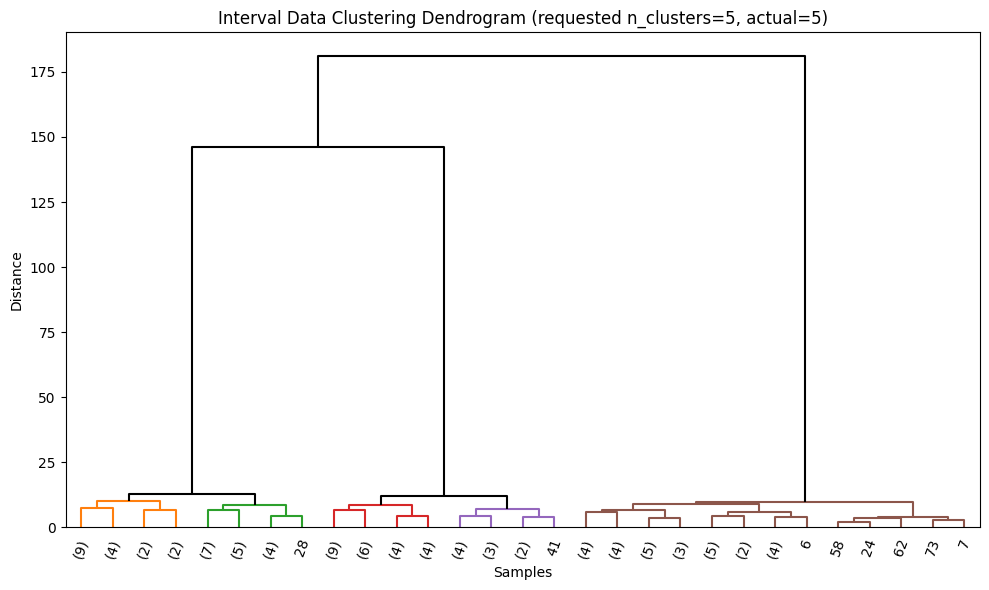

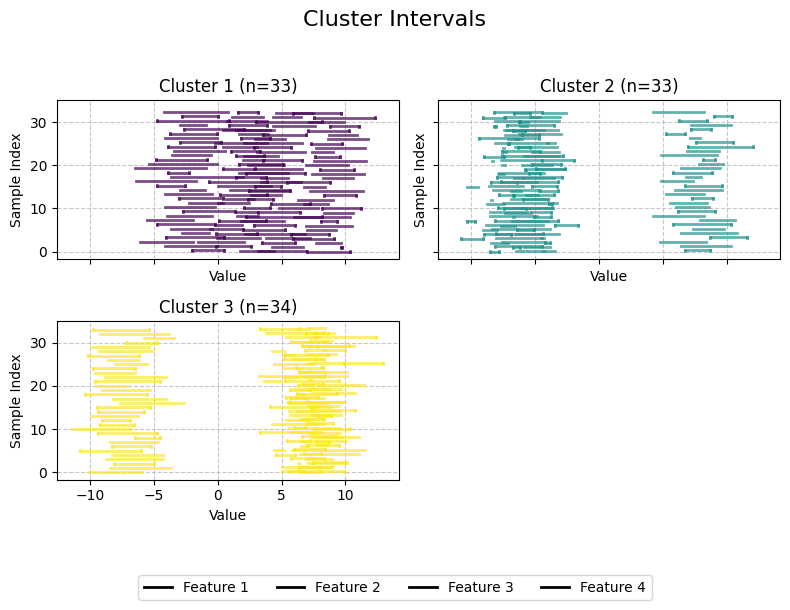

In [4]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='top',
    show_leaf_counts=True,
    figsize=(10,6)
)

fig, ax = Dendrogram.visualize_intervals(intervals = random_data.get_intervals() , labels = hmodel.labels_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

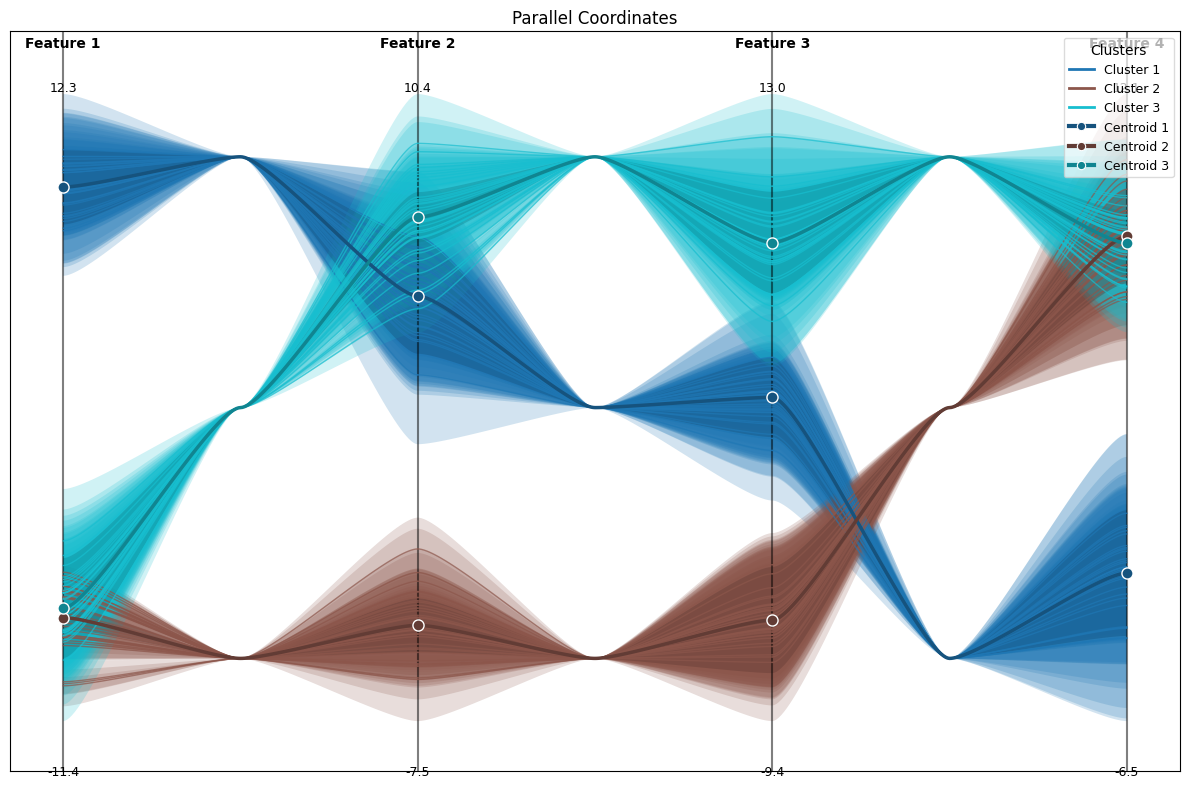

In [5]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


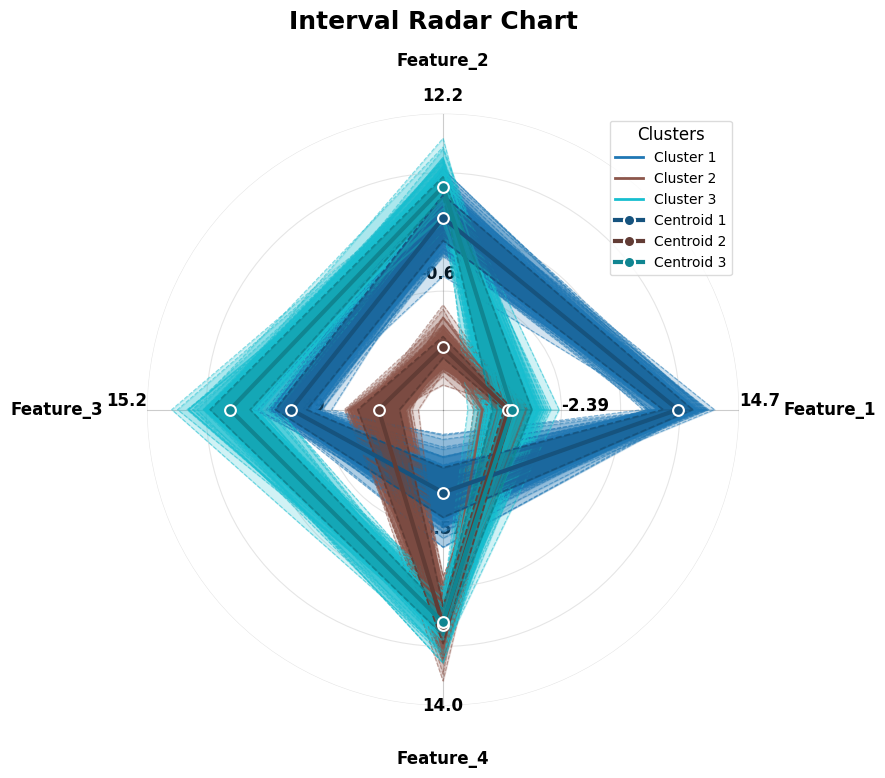

In [6]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

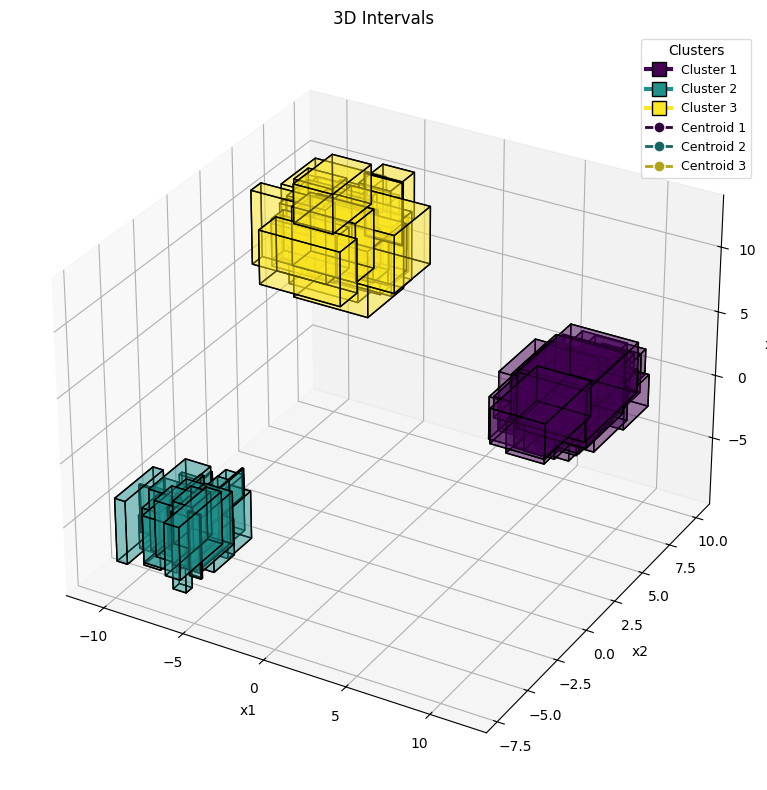

In [7]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)

In [9]:
hmodel.compute_metrics_for_k_range(intervals=random_data.get_intervals())

{'distortion': {2: 116.11748793249198,
  3: 9.252453807025534,
  4: 8.440708361350305,
  5: 7.6985959220684235,
  6: 7.171382110502652,
  7: 6.6906859498330755,
  8: 6.2888811190569935,
  9: 5.909505970028793,
  10: 5.553270287697372},
 'silhouette': {2: 0.619742742906843,
  3: 0.8404463186547783,
  4: 0.6195442388377902,
  5: 0.4153527256161727,
  6: 0.41735367718822763,
  7: 0.2055853679770875,
  8: 0.19091841708349805,
  9: 0.1928809274605144,
  10: 0.17305789653413634},
 'calinski_harabasz': {2: 138.48824172062015,
  3: 1420.311017490855,
  4: 1030.3122553450216,
  5: 840.6867006864888,
  6: 715.7749161403208,
  7: 633.6456651967505,
  8: 572.4523460220732,
  9: 527.9882325714098,
  10: 494.58263056726724},
 'davies_bouldin': {2: 0.5756004889838976,
  3: 0.22909943309503553,
  4: 1.0081059930562608,
  5: 1.364618467761467,
  6: 1.2989686980427388,
  7: 1.4725421338355869,
  8: 1.561583798143106,
  9: 1.495601194931875,
  10: 1.5080301756193317},
 'dunn': {2: 0.7572060996133262,
  3